In [2]:

# Assuming 100 gamblers with 100,000 each, and everyone wants to play 100,000 times. 

import numpy as np

gamblers = 100

def casino(win_rate, 
           win_once=1, 
           lose_once=1, 
           commission=0.01):
    
    my_money = 100000
    play_cnt = 100000
    commission = commission
    
    for _ in np.arange(1, play_cnt):
        
        w = np.random.binomial(1, win_rate)
        
        if w:
            my_money += win_once
        else:
            my_money -= lose_once
            
            if my_money <= 0:
                break
            
    return my_money

(array([0.00031766, 0.00015883, 0.00015883, 0.00047649, 0.00015883,
        0.00031766, 0.00047649, 0.00079416, 0.00127065, 0.00095299,
        0.00111182, 0.00095299, 0.00063532, 0.00031766, 0.00142948,
        0.00079416, 0.00111182, 0.00095299, 0.00111182, 0.00079416,
        0.00063532, 0.00047649, 0.00015883, 0.00015883, 0.00015883]),
 array([ 99151.  ,  99213.96,  99276.92,  99339.88,  99402.84,  99465.8 ,
         99528.76,  99591.72,  99654.68,  99717.64,  99780.6 ,  99843.56,
         99906.52,  99969.48, 100032.44, 100095.4 , 100158.36, 100221.32,
        100284.28, 100347.24, 100410.2 , 100473.16, 100536.12, 100599.08,
        100662.04, 100725.  ]),
 <a list of 25 Patch objects>)

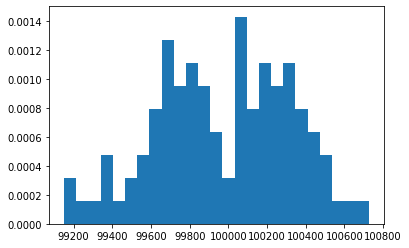

In [3]:

# Assuming no cheaters, no commissions, and 50% win

en_moneys = []
    
from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot

# Callback function
def done_callback(r):
    # done_callback runs on the main process
    en_moneys.append(r.result())

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, win_rate=0.5, commission=0)
        future_result.add_done_callback(done_callback)

pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00016689, 0.        , 0.00016689, 0.00016689, 0.00066756,
        0.00050067, 0.00016689, 0.00050067, 0.00066756, 0.00133511,
        0.00116822, 0.00133511, 0.00100134, 0.00050067, 0.00133511,
        0.00050067, 0.00116822, 0.00116822, 0.00100134, 0.00050067,
        0.00116822, 0.00016689, 0.        , 0.00100134, 0.00033378]),
 array([79199.  , 79258.92, 79318.84, 79378.76, 79438.68, 79498.6 ,
        79558.52, 79618.44, 79678.36, 79738.28, 79798.2 , 79858.12,
        79918.04, 79977.96, 80037.88, 80097.8 , 80157.72, 80217.64,
        80277.56, 80337.48, 80397.4 , 80457.32, 80517.24, 80577.16,
        80637.08, 80697.  ]),
 <a list of 25 Patch objects>)

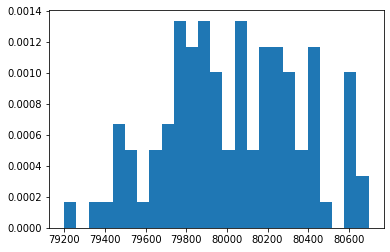

In [4]:

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, win_rate=0.4, commission=0)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00033557, 0.        , 0.        , 0.        , 0.        ,
        0.00016779, 0.00033557, 0.        , 0.00067114, 0.00083893,
        0.00134228, 0.00134228, 0.00134228, 0.00134228, 0.00083893,
        0.00033557, 0.00167785, 0.00167785, 0.00100671, 0.00083893,
        0.00083893, 0.00067114, 0.00067114, 0.00033557, 0.00016779]),
 array([ 99167. ,  99226.6,  99286.2,  99345.8,  99405.4,  99465. ,
         99524.6,  99584.2,  99643.8,  99703.4,  99763. ,  99822.6,
         99882.2,  99941.8, 100001.4, 100061. , 100120.6, 100180.2,
        100239.8, 100299.4, 100359. , 100418.6, 100478.2, 100537.8,
        100597.4, 100657. ]),
 <a list of 25 Patch objects>)

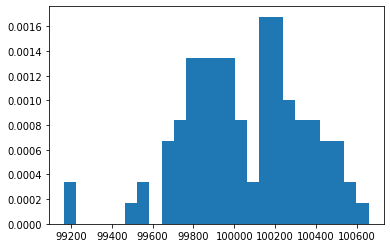

In [5]:

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, win_rate=0.5, commission=0.01)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00017147, 0.00017147, 0.00068587, 0.0005144 , 0.00068587,
        0.00102881, 0.00137174, 0.00120027, 0.00102881, 0.00068587,
        0.00068587, 0.00102881, 0.00120027, 0.00102881, 0.00120027,
        0.00137174, 0.00120027, 0.00017147, 0.0005144 , 0.00017147,
        0.00034294, 0.00017147, 0.        , 0.00017147, 0.00034294]),
 array([101376.98000041, 101435.30000041, 101493.62000041, 101551.94000041,
        101610.26000041, 101668.58000041, 101726.90000041, 101785.22000041,
        101843.54000041, 101901.86000041, 101960.18000041, 102018.50000041,
        102076.82000041, 102135.14000041, 102193.46000041, 102251.78000041,
        102310.10000041, 102368.42000041, 102426.74000041, 102485.06000041,
        102543.38000041, 102601.70000041, 102660.02000041, 102718.34000041,
        102776.66000041, 102834.98000041]),
 <a list of 25 Patch objects>)

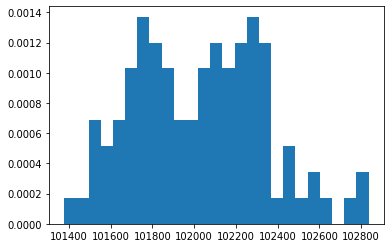

In [6]:

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, 
                                    win_rate=0.5, 
                                    win_once=1.02, 
                                    lose_once=0.98, 
                                    commission=0.01)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)


(array([0.00064683, 0.00016171, 0.        , 0.00032342, 0.00016171,
        0.00080854, 0.00064683, 0.00048512, 0.00080854, 0.00064683,
        0.00113195, 0.00194049, 0.00194049, 0.00113195, 0.00177878,
        0.        , 0.00064683, 0.00064683, 0.00048512, 0.00032342,
        0.00048512, 0.00032342, 0.00032342, 0.        , 0.00032342]),
 array([91230.98000041, 91292.82000041, 91354.66000041, 91416.50000041,
        91478.34000041, 91540.18000041, 91602.02000041, 91663.86000041,
        91725.70000041, 91787.54000041, 91849.38000041, 91911.22000041,
        91973.06000041, 92034.90000041, 92096.74000041, 92158.58000041,
        92220.42000041, 92282.26000041, 92344.10000041, 92405.94000041,
        92467.78000041, 92529.62000041, 92591.46000041, 92653.30000041,
        92715.14000041, 92776.98000041]),
 <a list of 25 Patch objects>)

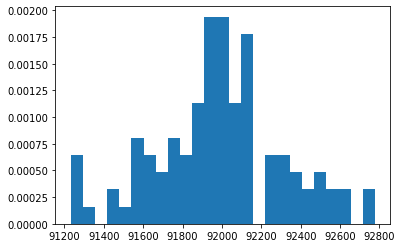

In [7]:
 # Also assuming win_once you make 2%, while lose once, you lose 2%

en_moneys = []

with ThreadPoolExecutor() as pool:
    for _ in range(gamblers):
        future_result = pool.submit(casino, 
                                    win_rate=0.45, 
                                    win_once=1.02, 
                                    lose_once=0.98, 
                                    commission=0.01)
        future_result.add_done_callback(done_callback)
        
pyplot.hist(en_moneys, 
            bins=25, 
            density=True)
